<a href="https://colab.research.google.com/github/ShaifEmon/usd_car_price_prediction/blob/main/Used_Car_Price_Prediction(8k%2B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,StandardScaler 

Data Collection and Processing

In [1127]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/Car details v3.csv')

In [1128]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [1129]:
# checking the number of rows and columns
car_dataset.shape

(8128, 13)

In [1130]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1131]:
# checking the number of missing values
car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [1132]:
# checking the distribution of categorical data

print(car_dataset.owner.value_counts())

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


Encoding the Categorical Data

In [1133]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2,' Dealer':3,' ':4}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4,}},inplace=True)

In [1134]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [1135]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 825.6+ KB


removing null values

In [1136]:

car_dataset=car_dataset[~car_dataset['mileage'].isna()]


In [1137]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   seller_type    7907 non-null   int64  
 6   transmission   7907 non-null   int64  
 7   owner          7907 non-null   int64  
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 864.8+ KB


In [1138]:
car_dataset['mileage']=car_dataset['mileage'].str.split(' ').str.get(0)
car_dataset['engine']=car_dataset['engine'].str.split(' ').str.get(0)
car_dataset['max_power']=car_dataset['max_power'].str.split(' ').str.get(0)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [1139]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [1140]:
car_dataset=car_dataset.drop(['torque'],axis=1)




In [1141]:
car_dataset['mileage']=car_dataset['mileage'].astype(float)
car_dataset['engine']=car_dataset['engine'].astype(float)

In [1142]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   seller_type    7907 non-null   int64  
 6   transmission   7907 non-null   int64  
 7   owner          7907 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 803.1+ KB


In [1143]:
car_dataset.shape

(7907, 12)

Splitting the data and Target

In [1144]:
X = car_dataset.drop(['name','selling_price','max_power'],axis=1)
Y = car_dataset['selling_price']



In [1145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7907 non-null   int64  
 1   km_driven     7907 non-null   int64  
 2   fuel          7907 non-null   int64  
 3   seller_type   7907 non-null   int64  
 4   transmission  7907 non-null   int64  
 5   owner         7907 non-null   int64  
 6   mileage       7907 non-null   float64
 7   engine        7907 non-null   float64
 8   seats         7907 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 617.7 KB


In [1146]:
print(X)

      year  km_driven  fuel  seller_type  ...  owner  mileage  engine  seats
0     2014     145500     1            0  ...      0    23.40  1248.0    5.0
1     2014     120000     1            0  ...      1    21.14  1498.0    5.0
2     2006     140000     0            0  ...      2    17.70  1497.0    5.0
3     2010     127000     1            0  ...      0    23.00  1396.0    5.0
4     2007     120000     0            0  ...      0    16.10  1298.0    5.0
...    ...        ...   ...          ...  ...    ...      ...     ...    ...
8123  2013     110000     0            0  ...      0    18.50  1197.0    5.0
8124  2007     119000     1            0  ...      3    16.80  1493.0    5.0
8125  2009     120000     1            0  ...      0    19.30  1248.0    5.0
8126  2013      25000     1            0  ...      0    23.57  1396.0    5.0
8127  2013      25000     1            0  ...      0    23.57  1396.0    5.0

[7907 rows x 9 columns]


In [1147]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7907, dtype: int64


Splitting Training and Test data

In [1148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [1149]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [1150]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [1151]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5582260424355576


In [1152]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 535604.7907069229


In [1153]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [1154]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6029617389560106


In [1155]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 554100.8272373159


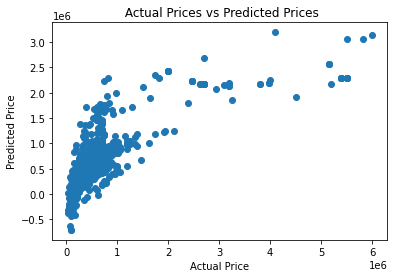

In [1156]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [1157]:
# loading the linear regression model
lass_reg_model = Lasso()

In [1158]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [1179]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5582260423981291


In [1181]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 535604.790729612


In [1160]:
# prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [1161]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6029610667965706


In [1162]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 554101.2962650906


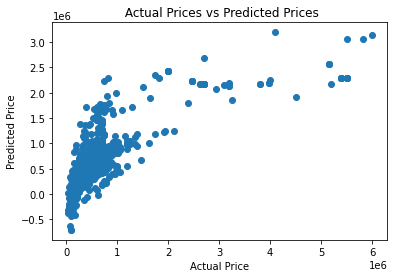

In [1163]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

3. Extra Tress Regression

In [1189]:
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [1190]:
# prediction on Training data
training_data_prediction = model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9995823454065867


In [ ]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print("Mean Squred Error :",mse)

In [1192]:
# prediction on test data
test_data_prediction = model.predict(X_test)

In [1193]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9782853143355605


In [1194]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 129583.40634581461


Visualize the actual prices and Predicted prices

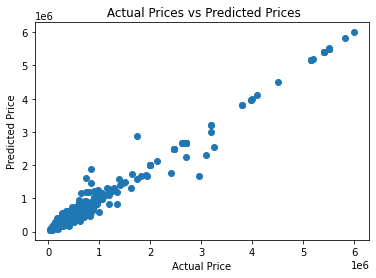

In [1169]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

3. Random Forest Model


In [1195]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,Y_train)

RandomForestRegressor()

In [1197]:
# prediction on Training data
training_data_prediction = random_forest_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9922516607621713


In [1198]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 70933.06252979056


# prediction on Test data

In [1199]:
test_data_prediction = random_forest_model.predict(X_test)

In [1201]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9794673412925872


In [1202]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print("Mean Squred Error :",mse)

Mean Squred Error : 126007.15690389226


Visualize the actual prices and Predicted prices

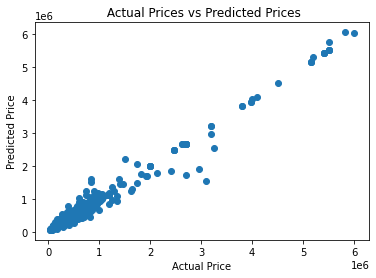

In [1174]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [1175]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,0,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,2,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,0,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,0,16.10,1298.0,88.2,5.0


In [1176]:
input= [[ 2006,140000, 0, 0, 0,2, 17.70,1497.0, 5.0]]

In [1177]:
random_forest_model.predict(input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([157836.])